# Team as an entity model

This model is a

In [1]:
# Import
from torch import nn
from torch.utils.data import DataLoader

from models.models import *
from datasets.datasets import *
from utils import *

c:\Users\thgla\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Meta
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#device = torch.device("cpu")
print(f"Device: {device}")

Device: cuda


# Dataset

In [3]:
NL=[1,2,3,4,5]
dataset = get_player_dataset(NL=NL)

reading file
Loaded 13794 rows.
Normalizing features
['GP', 'G', 'A', 'PTS', 'PS', 'EV', 'PP', 'S']
Loading player data
creating dataset structure
creating player dict


In [4]:
#number of players:
print(dataset.alldata['Player'].nunique())

2522


# Dataloader

In [111]:
batch_size = 100

N_datasets = dataset.random_split(0.2)

N_datasets_train = []
N_datasets_test = []
N_dataloaders_train = {}   
N_dataloaders_test = {}

for (N, train_dataset, test_dataset) in N_datasets:
    N_datasets_train.append(PlayerDataset(train_dataset, max_N=N))
    N_datasets_test.append(PlayerDataset(test_dataset, max_N=N))

    print(f"Train size for {N} seasons: {len(N_datasets_train[-1])}")
    print(f"Test size for {N} seasons: {len(N_datasets_test[-1])}")

    N_dataloaders_train[N] = (DataLoader(N_datasets_train[-1], batch_size=batch_size, shuffle=True))
    N_dataloaders_test[N] = (DataLoader(N_datasets_test[-1], batch_size=batch_size, shuffle=True))


print(N_datasets_train[0].__getitem__(0))

Train size for 1 seasons: 8025
Test size for 1 seasons: 2019
Train size for 2 seasons: 6124
Test size for 2 seasons: 1544
Train size for 3 seasons: 4749
Test size for 3 seasons: 1196
Train size for 4 seasons: 3702
Test size for 4 seasons: 928
Train size for 5 seasons: 2875
Test size for 5 seasons: 715
(tensor([[-0.3110, -0.7990, -0.2150, -0.3548, -0.9252, -0.7037, -0.7603,  0.1125]]), tensor([-1.6527, -1.4110, -1.6841, -1.8132, -0.9924, -1.3815, -0.7603, -1.8021]))


# Training and Validation

In [112]:
hidden_size = 10
MLP_hidden_size = 10
num_layers = 1
lr = 0.001
epochs = 50
loss_interval = 5

model_N = []
model_N_losses = []


for i in range(5):
    print(f"Training model for {i+1} seasons")
    input_size = len(N_datasets_train[i].__getitem__(0)[0][0])
    model_N.append(PlayerStandalone(input_size=input_size, hidden_size=hidden_size, MLP_hidden_size=MLP_hidden_size, num_layers=num_layers, device=device).to(device))
    criterion = RMSELoss()
    optimizer = torch.optim.Adam(model_N[i].parameters(), lr=lr)
    
    (model_N[i], train_losses,val_losses) = train_and_validate(model_N[i], criterion, optimizer, N_dataloaders_train[i+1], N_dataloaders_test[i+1], epochs=epochs, loss_interval=loss_interval, device=device)
    model_N_losses.append((train_losses, val_losses))
    

hidden_size = 10
MLP_hidden_size = 10
num_layers = 1  
lr = 0.001
epochs = 50
loss_interval = 5
  
# Train on all data
print("Training model for all seasons")
input_size = len(N_datasets_train[0].__getitem__(0)[0][0])
model_all = PlayerStandalone(input_size=input_size, hidden_size=hidden_size, MLP_hidden_size=MLP_hidden_size, num_layers=num_layers, device=device).to(device)
criterion = RMSELoss()
optimizer = torch.optim.Adam(model_all.parameters(), lr=lr)
(model_all, train_losses,val_losses) = train_and_validate_varying_N(model_all, criterion, optimizer, N_dataloaders_train, N_dataloaders_test, epochs=epochs, loss_interval=loss_interval, device=device)

model_all_losses = (train_losses, val_losses)






Training model for 1 seasons
0 th epoch :  0.9435248301352983
Validation loss for epoch 0: 0.8742960464386713
Validation loss for epoch 5: 0.7086941912060692
10 th epoch :  0.6639091195883574
Validation loss for epoch 10: 0.684140994435265
Validation loss for epoch 15: 0.6753634100868589
20 th epoch :  0.6575457748071647
Validation loss for epoch 20: 0.6770096137410119
Validation loss for epoch 25: 0.6768502621423631
30 th epoch :  0.6555621594558527
Validation loss for epoch 30: 0.6735581784021287
Validation loss for epoch 35: 0.6753293417748951
40 th epoch :  0.6545217920232702
Validation loss for epoch 40: 0.6726628769011724
Validation loss for epoch 45: 0.6770967074802944
Training model for 2 seasons
0 th epoch :  0.9418761509080087
Validation loss for epoch 0: 0.8345186337828636
Validation loss for epoch 5: 0.6919463165104389
10 th epoch :  0.6540682806122687
Validation loss for epoch 10: 0.6752223446965218
Validation loss for epoch 15: 0.6538023352622986
20 th epoch :  0.63132743

In [113]:
lr = 0.001
epochs = 50
loss_interval = 5

model_linear_N = []
model_linear_N_losses = []


for i in range(5):
    print(f"Training model for {i+1} seasons")
    input_size = len(N_datasets_train[i].__getitem__(0)[0][0])
    model_linear_N.append(PlayerLinear(input_size=input_size, N=i+1, device=device).to(device))
    criterion = RMSELoss()
    optimizer = torch.optim.Adam(model_linear_N[i].parameters(), lr=lr)
    
    (model_linear_N[i], train_losses,val_losses) = train_and_validate(model_linear_N[i], criterion, optimizer, N_dataloaders_train[i+1], N_dataloaders_test[i+1], epochs=epochs, loss_interval=loss_interval, device=device)
    model_linear_N_losses.append((train_losses, val_losses))


lr = 0.001
epochs = 50
loss_interval = 5

# Train on all data
print("Training model for all seasons")
input_size = len(N_datasets_train[0].__getitem__(0)[0][0])
model_linear_all = PlayerLinear(input_size=input_size, N=5, device=device).to(device)
criterion = RMSELoss()
optimizer = torch.optim.Adam(model_linear_all.parameters(), lr=lr)
(model_linear_all, train_losses,val_losses) = train_and_validate_varying_N(model_linear_all, criterion, optimizer, N_dataloaders_train, N_dataloaders_test, epochs=epochs, loss_interval=loss_interval, device=device)

model_linear_all_losses = (train_losses, val_losses)

Training model for 1 seasons
0 th epoch :  1.0886161378872248
Validation loss for epoch 0: 0.9093349689529056
Validation loss for epoch 5: 0.7117907660348075
10 th epoch :  0.680710005171505
Validation loss for epoch 10: 0.6969167192776998
Validation loss for epoch 15: 0.689614230678195
20 th epoch :  0.6683680172319766
Validation loss for epoch 20: 0.6809642087845575
Validation loss for epoch 25: 0.6779979694457281
30 th epoch :  0.6671497888035245
Validation loss for epoch 30: 0.6823525740986779
Validation loss for epoch 35: 0.6933457624344599
40 th epoch :  0.6661970534442384
Validation loss for epoch 40: 0.6820406516393026
Validation loss for epoch 45: 0.6932307424999419
Training model for 2 seasons
0 th epoch :  0.904737651348114
Validation loss for epoch 0: 0.7837196737527847
Validation loss for epoch 5: 0.6726018935441971
10 th epoch :  0.6429161429405212
Validation loss for epoch 10: 0.6565280109643936
Validation loss for epoch 15: 0.6590463444590569
20 th epoch :  0.6361370125

In [114]:
#average results baseline
criterion = RMSELoss()
avg_loss_N = []

for i in range(5):
    avg_pred = []
    avg_target = []
    for (x, y) in N_datasets_train[i]:
        avg_pred.append(torch.mean(x, dim=0))
        avg_target.append(y)
    avg_pred = torch.stack(avg_pred)
    avg_target = torch.stack(avg_target)
    avg_loss_N.append(criterion(avg_pred, avg_target))
    

In [115]:
#evaluate model trained on all N for individual N
criterion = RMSELoss()
model_all_losses_N = []
for i in range(5):
    avg_pred = []
    avg_target = []
    for (x, y) in N_datasets_train[i]:
        pred = model_all(x.unsqueeze(0).to(device))[0]
        avg_pred.append(pred.cpu().detach())
        avg_target.append(y)
    avg_pred = torch.stack(avg_pred)
    avg_target = torch.stack(avg_target)
    train_loss = criterion(avg_pred, avg_target)
    
    avg_pred = []
    avg_target = []
    for (x, y) in N_datasets_test[i]:
        pred = model_all(x.unsqueeze(0).to(device))[0]
        avg_pred.append(pred.cpu().detach())
        avg_target.append(y)
    avg_pred = torch.stack(avg_pred)
    avg_target = torch.stack(avg_target)
    test_loss = criterion(avg_pred, avg_target)
    model_all_losses_N.append((train_loss, test_loss))

In [116]:
 
model_linear_all_losses_N = []
for i in range(5):
    avg_pred = []
    avg_target = []
    for (x, y) in N_datasets_train[i]:
        pred = model_linear_all(x.unsqueeze(0).to(device))[0]
        avg_pred.append(pred.cpu().detach())
        avg_target.append(y)
    avg_pred = torch.stack(avg_pred)
    avg_target = torch.stack(avg_target)
    train_loss = criterion(avg_pred, avg_target)
    
    avg_pred = []
    avg_target = []
    for (x, y) in N_datasets_test[i]:
        pred = model_linear_all(x.unsqueeze(0).to(device))[0]
        avg_pred.append(pred.cpu().detach())
        avg_target.append(y)
    avg_pred = torch.stack(avg_pred)
    avg_target = torch.stack(avg_target)
    test_loss = criterion(avg_pred, avg_target)
    model_linear_all_losses_N.append((train_loss, test_loss))

# Plot Results

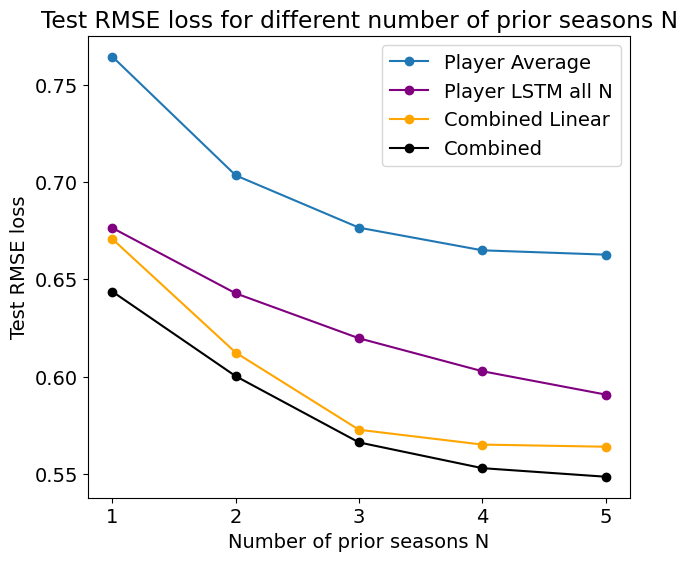

In [147]:
combined_model_test_lossses = [0.6437,0.6003,0.5663,0.5531,0.5487]
combined_linear_model_test_lossses = [0.6707,0.6124,0.5728,0.5652,0.5641]

plt.figure(figsize=(7,6))
#plot seaons on x-axis and final validation loss on y-axis
plt.title('Test RMSE loss for different number of prior seasons N')
plt.plot(range(1,6), avg_loss_N, label='Player Average',marker='o')

# plt.plot(range(1,6), [model_linear_N_losses[i][1][-1] for i in range(5)], label='Linear fixed N',marker='o')
# plt.plot(range(1,6), [model_linear_all_losses_N[i][1] for i in range(5)], label='Linear all N',marker='o')
# plt.plot(range(1,6), [model_N_losses[i][1][-1] for i in range(5)], label='LSTM fixed N',marker='o')
plt.plot(range(1,6), [model_all_losses_N[i][1] for i in range(5)], label='Player LSTM all N',marker='o',color='purple')
plt.plot(range(1,6), combined_linear_model_test_lossses, label='Combined Linear',marker='o',color='orange')
plt.plot(range(1,6), combined_model_test_lossses, label='Combined',marker='o',color='black')


plt.xlabel('Number of prior seasons N')
plt.ylabel('Test RMSE loss')
plt.xticks(range(1,6))
plt.legend(loc='upper right')

In [130]:
#save model_all to file
torch.save(model_all.state_dict(), 'models/checkpoints/player_standalone_all_N.pth')

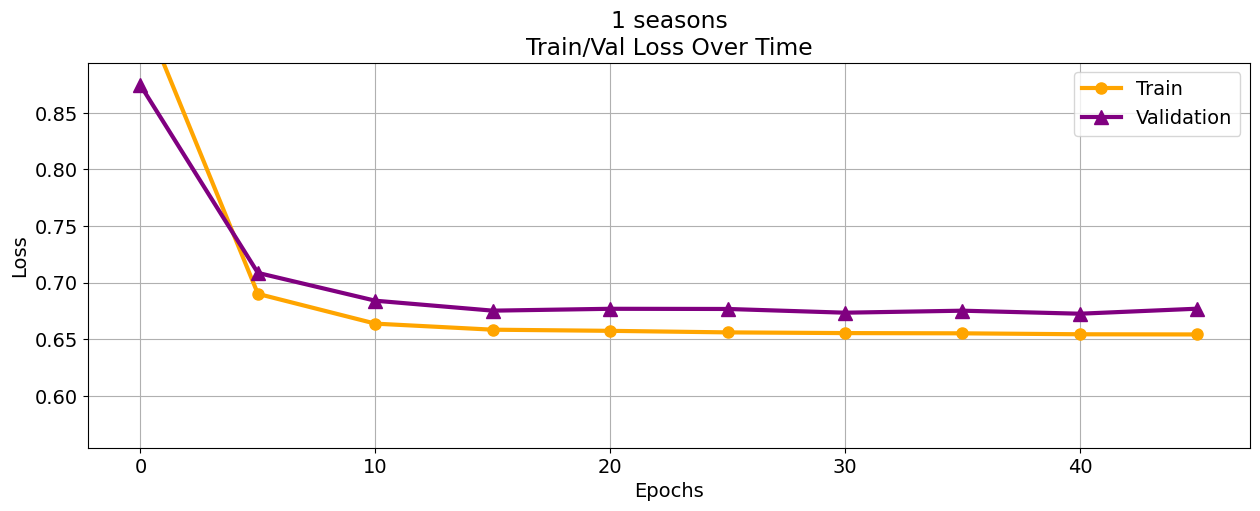

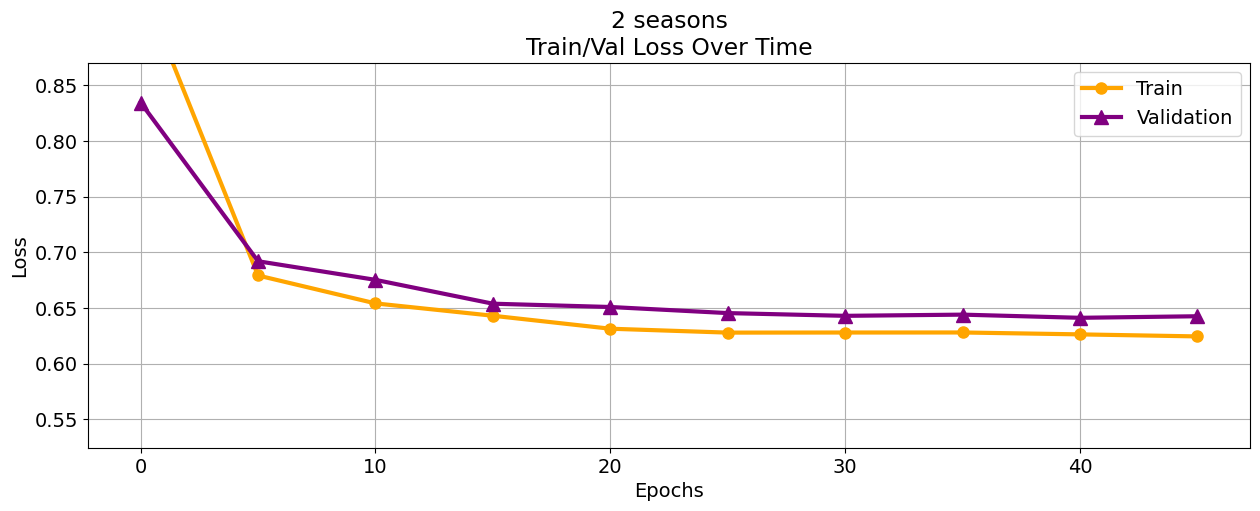

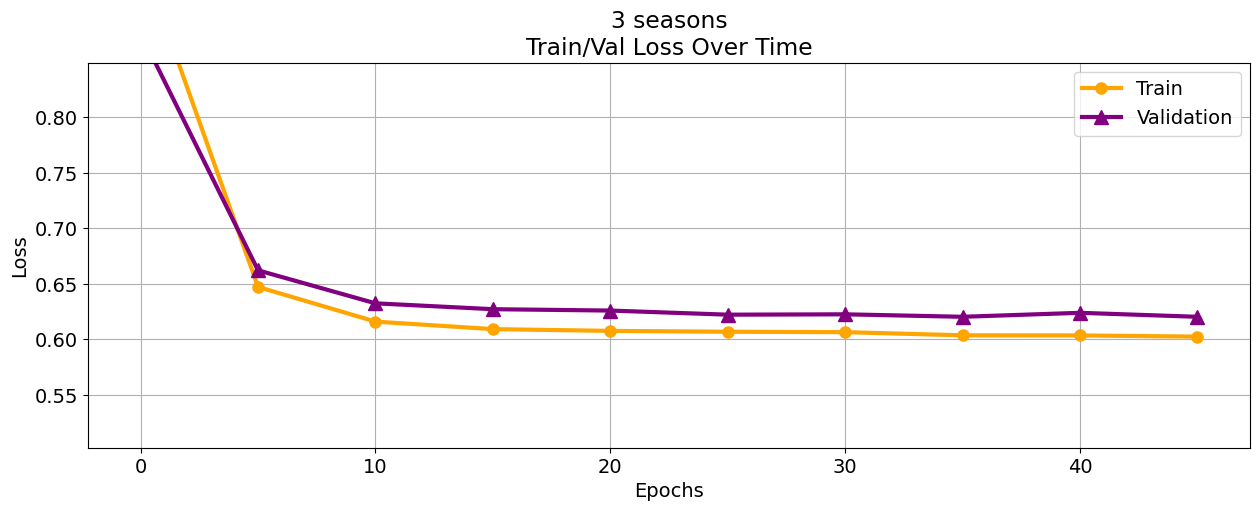

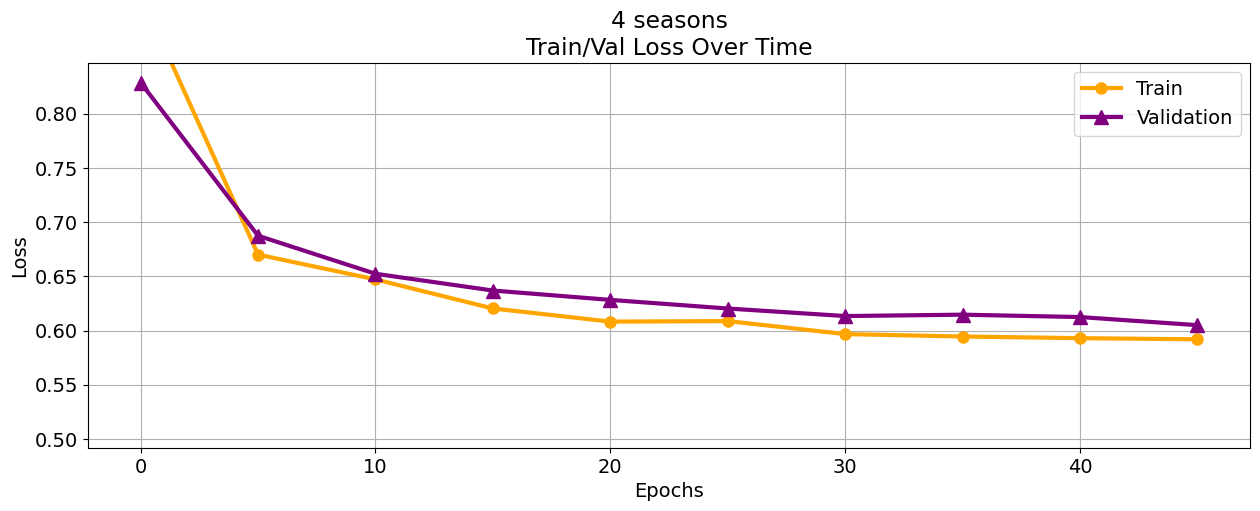

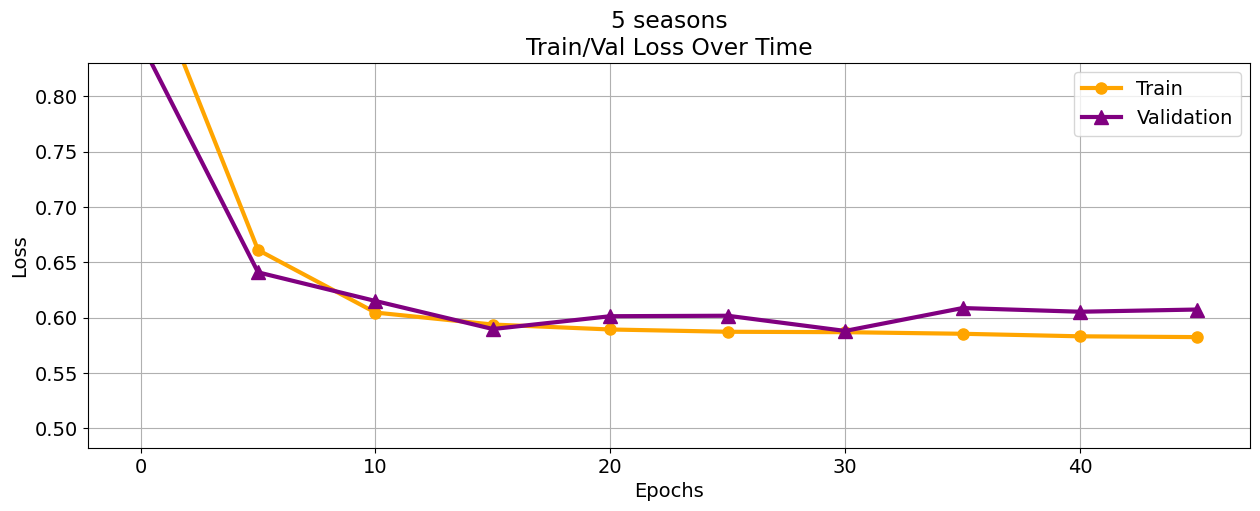

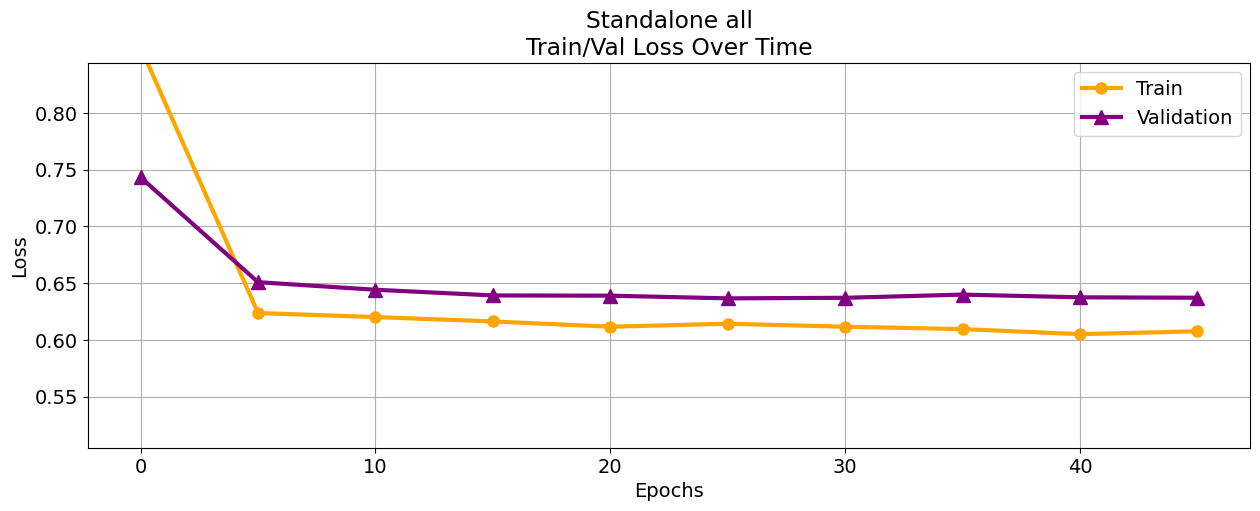

In [118]:
#plot training and validation loss model_N_losses
plot_train_v_loss("1 seasons", model_N_losses[0][0], model_N_losses[0][1],5)
plot_train_v_loss("2 seasons", model_N_losses[1][0], model_N_losses[1][1],5)
plot_train_v_loss("3 seasons", model_N_losses[2][0], model_N_losses[2][1],5)
plot_train_v_loss("4 seasons", model_N_losses[3][0], model_N_losses[3][1],5)
plot_train_v_loss("5 seasons", model_N_losses[4][0], model_N_losses[4][1],5)

#plot training loss and validation loss for model_all_losses
plot_train_v_loss('Standalone all',model_all_losses[0], model_all_losses[1], 5)

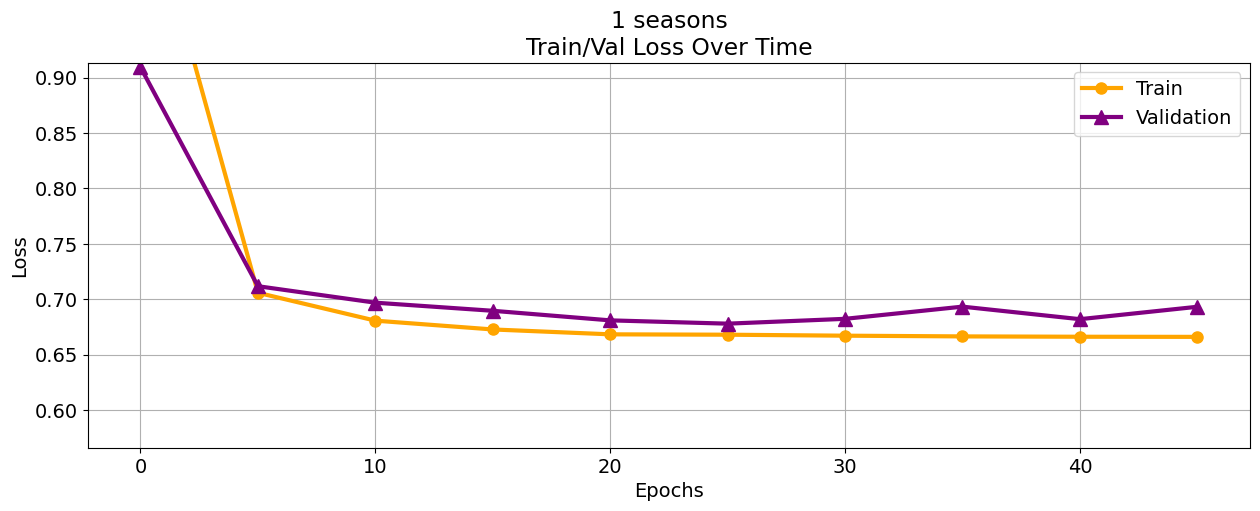

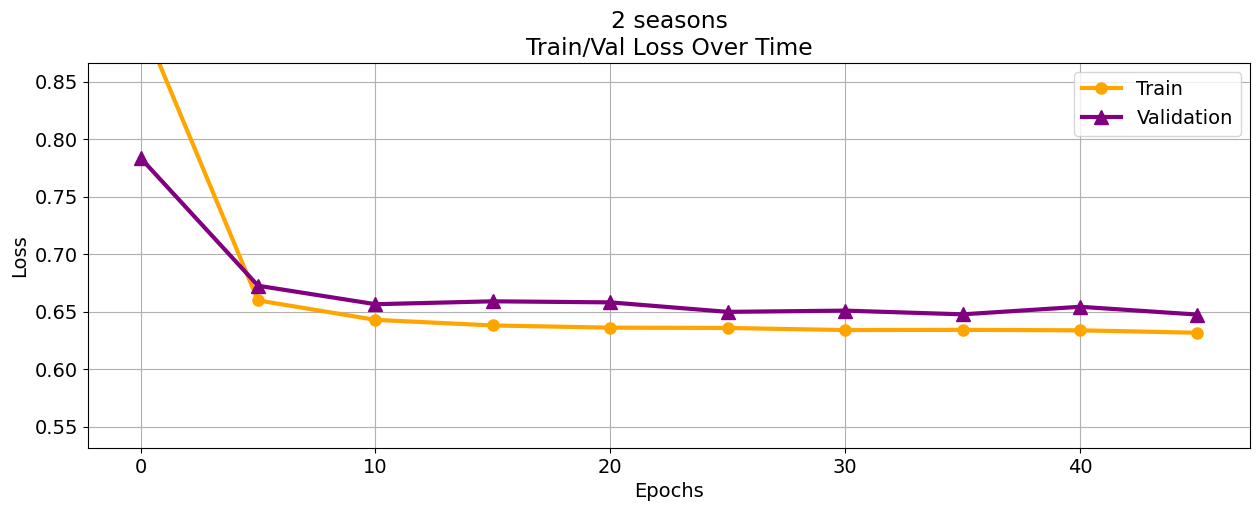

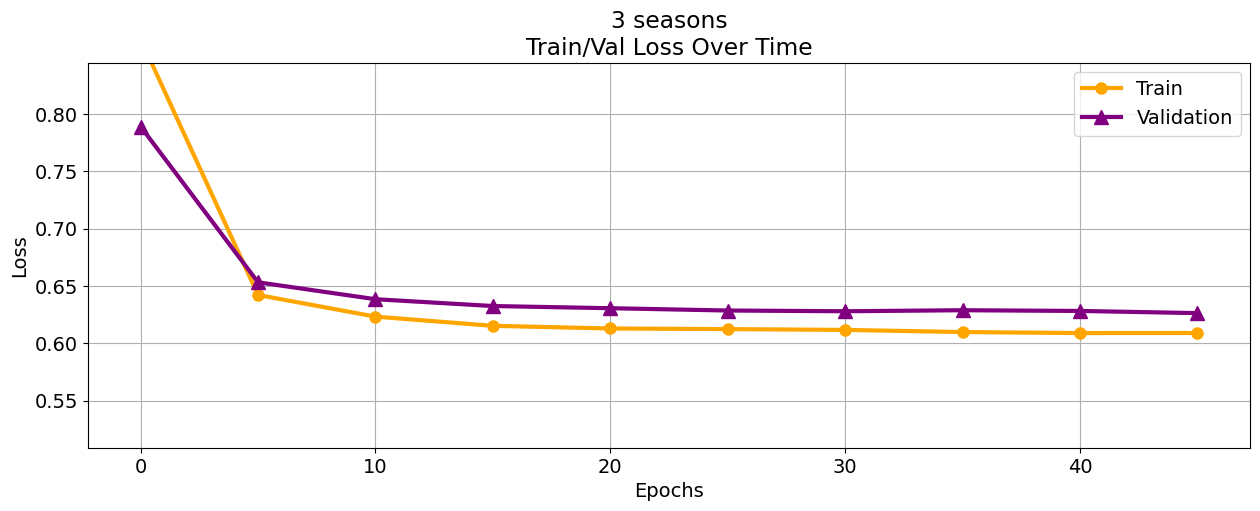

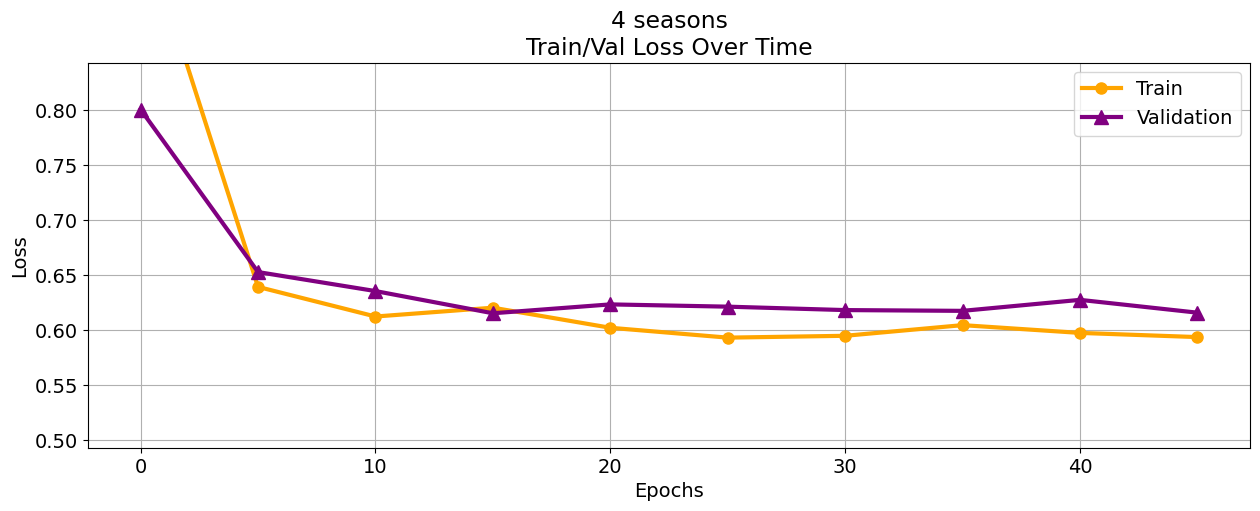

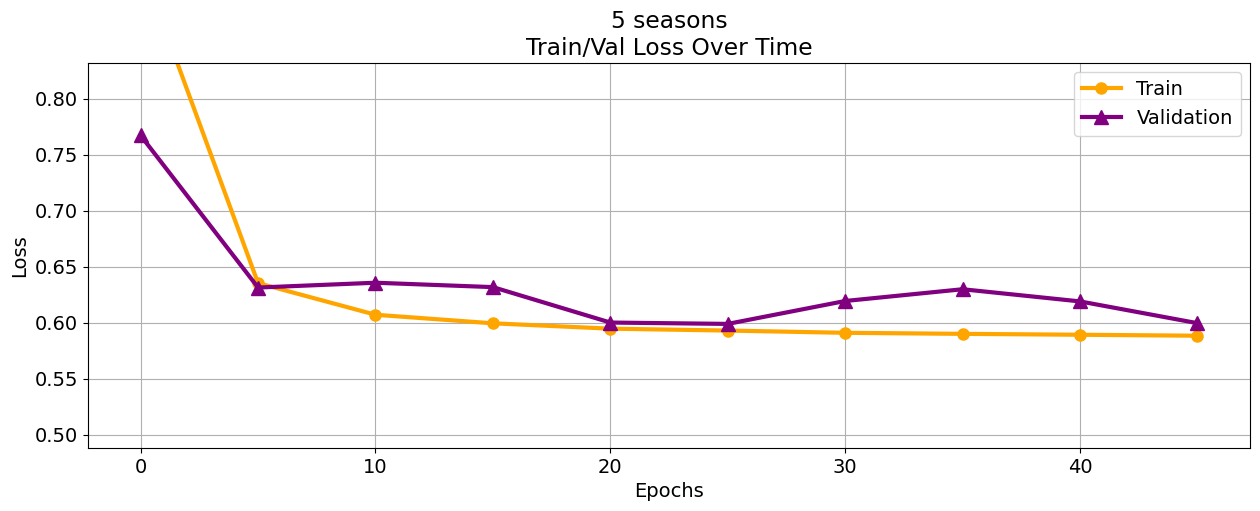

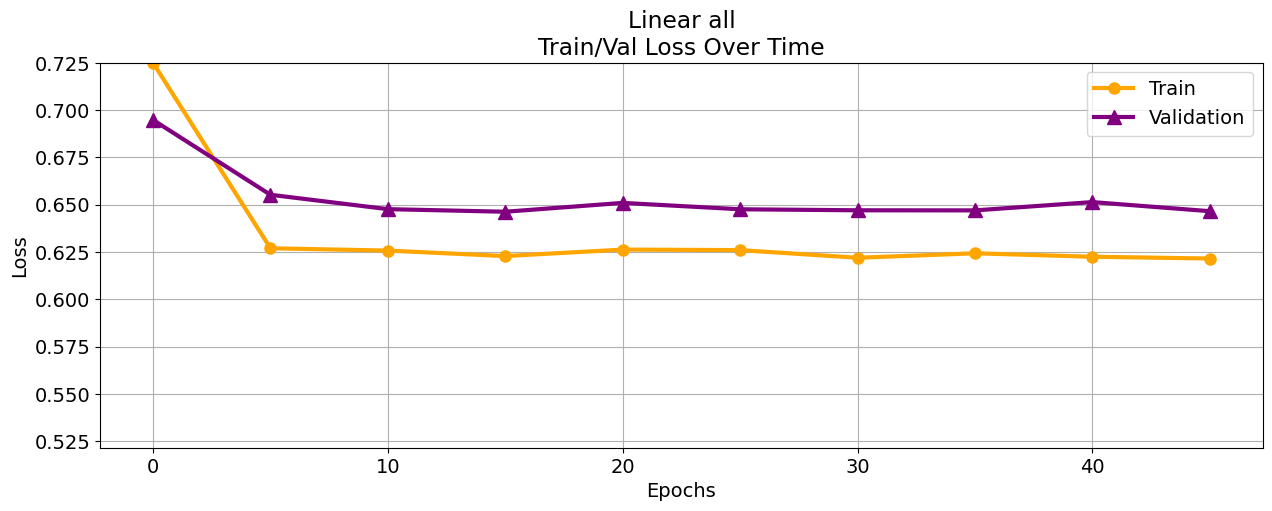

In [119]:
#plot linear model training and validation loss
plot_train_v_loss("1 seasons", model_linear_N_losses[0][0], model_linear_N_losses[0][1],5)
plot_train_v_loss("2 seasons", model_linear_N_losses[1][0], model_linear_N_losses[1][1],5)
plot_train_v_loss("3 seasons", model_linear_N_losses[2][0], model_linear_N_losses[2][1],5)
plot_train_v_loss("4 seasons", model_linear_N_losses[3][0], model_linear_N_losses[3][1],5)
plot_train_v_loss("5 seasons", model_linear_N_losses[4][0], model_linear_N_losses[4][1],5)

#plot training loss and validation loss for model_linear_all_losses
plot_train_v_loss('Linear all',model_linear_all_losses[0], model_linear_all_losses[1], 5)

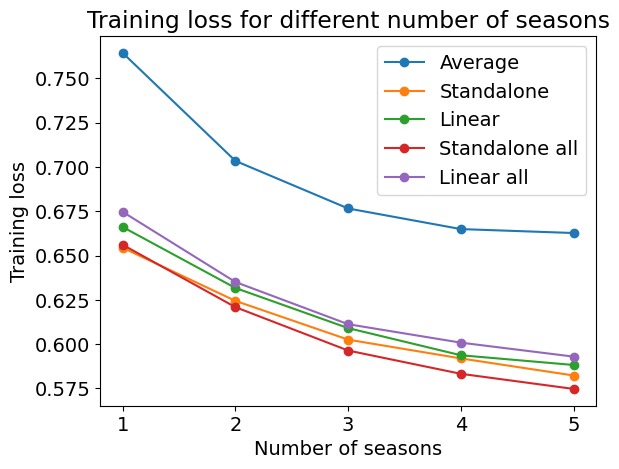

In [120]:
plt.title('Training loss for different number of seasons')
plt.plot(range(1,6), avg_loss_N, label='Average',marker='o')
plt.plot(range(1,6), [model_N_losses[i][0][-1] for i in range(5)], label='Standalone',marker='o')
plt.plot(range(1,6), [model_linear_N_losses[i][0][-1] for i in range(5)], label='Linear',marker='o')
plt.plot(range(1,6), [model_all_losses_N[i][0] for i in range(5)], label='Standalone all',marker='o')
plt.plot(range(1,6), [model_linear_all_losses_N[i][0] for i in range(5)], label='Linear all',marker='o')
plt.xlabel('Number of seasons')
plt.ylabel('Training loss')
plt.xticks(range(1,6))
plt.legend()


In [123]:
# get parameter count for all models
def get_n_params(model):
    pp=0
    for p in list(model.parameters()):
        nn=1
        for s in list(p.size()):
            nn = nn*s
        pp += nn
    return pp

for i in range(5):
    print(f"Number of parameters for model {i+1} seasons: {get_n_params(model_N[i])}")
    print(f"Number of parameters for linear model {i+1} seasons: {get_n_params(model_linear_N[i])}")


Number of parameters for model 1 seasons: 998
Number of parameters for linear model 1 seasons: 72
Number of parameters for model 2 seasons: 998
Number of parameters for linear model 2 seasons: 136
Number of parameters for model 3 seasons: 998
Number of parameters for linear model 3 seasons: 200
Number of parameters for model 4 seasons: 998
Number of parameters for linear model 4 seasons: 264
Number of parameters for model 5 seasons: 998
Number of parameters for linear model 5 seasons: 328
